#**Istanbul Technical Univerisity (İTÜ)**
**Department of Cybersecurity and İnformatics**                 
**Term Semester Academic Years 2024-2025**

```
Prof. Dr. Ömer Faruk Tuna, PhD
BGK 520E, CRN 13653
```
```
StudentID:704231023
Student Name:Mohammad Noor İslam
```

# Introduction
In this project's **first part**, I will implement data generation and model training and uncertainty quantification and visualization. I would like to create 100 random data pairs (x,y) on the line *y = 2x + 1* in the interval *−5 ≤ x ≤ 5* (training data generation). Train a single hidden layer neural network with fifteen neurons to learn the above linear function using these 100 random pairs. Create 150 random data pairs (x,y) on the line *y = 2x + 1* in the interval *−10 ≤ x ≤ 10* (test data generation). **The second part** is the implementation of uncertainty quantification during adversarial attack. Train a CNN model with dropout layers on the MNIST Digit dataset (use this model for all the steps below). Pick a test sample from the test dataset and apply the BIM attack algorithm for 30 iterations *(You may set alpha = 0.01, number of iterations = 30, and epsilon = 0.18)*. Use the l-infinity norm. At each iteration of the attack implementation, quantify the epistemic uncertainty value for the interim adversarial sample and save the uncertain values in an array.

# 1.1 Data Generation and Model Training (20 Points)

I created first Training Data Generate
𝑥
values uniformly between
[
−
5
,
5
]. Compute
𝑦
=
2𝑥
+
1.

The secondly the Test Data Generate
𝑥 values uniformly between
[
−
10
,
10
]. Compute
𝑦
=
2𝑥
+
1.


In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Training data generation
x_train = np.random.uniform(-5, 5, 100).reshape(-1, 1)
y_train = 2 * x_train + 1

# Test data generation
x_test = np.random.uniform(-10, 10, 150).reshape(-1, 1)
y_test = 2 * x_test + 1


2. I would like to first model training a neural network with one hidden layer of 15 neurons using ReLU activation. One output neuron for regression.

In [2]:
# Define the Neural Network Model
model = Sequential([
    Dense(15, activation='relu', input_dim=1),  # Hidden layer with 15 neurons
    Dropout(0.2),                              # Dropout for uncertainty quantification
    Dense(1)                                   # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=100, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 222ms/step - loss: 53.4886
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 51.8917  
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49.6313 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50.0206 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46.8071 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 46.4450 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46.3309 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42.5783 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44.7279 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42.6456 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43.1839 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44.5191 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38.0676 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42.3553 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37.2767 
Ep

#1.2 Uncertainty Quantification and Visualization (30 Points)
3. Uncertainty Quantification Monte Carlo Dropout Perform multiple stochastic forward passes by enabling dropout during prediction. Compute the mean and standard deviation of predictions.

In [3]:
# Function for Monte Carlo Dropout
def predict_with_uncertainty(f_model, x_data, num_samples=100):
    preds = np.array([f_model(x_data, training=True) for _ in range(num_samples)])
    mean_preds = preds.mean(axis=0)
    uncertainty = preds.std(axis=0)
    return mean_preds, uncertainty

# Perform uncertainty quantification on test data
y_pred_mc, uncertainty = predict_with_uncertainty(model, x_test, num_samples=100)


4. Visualization: In this section I will plot the predictions with error bars showing uncertainty. Training data and true line for comparison.

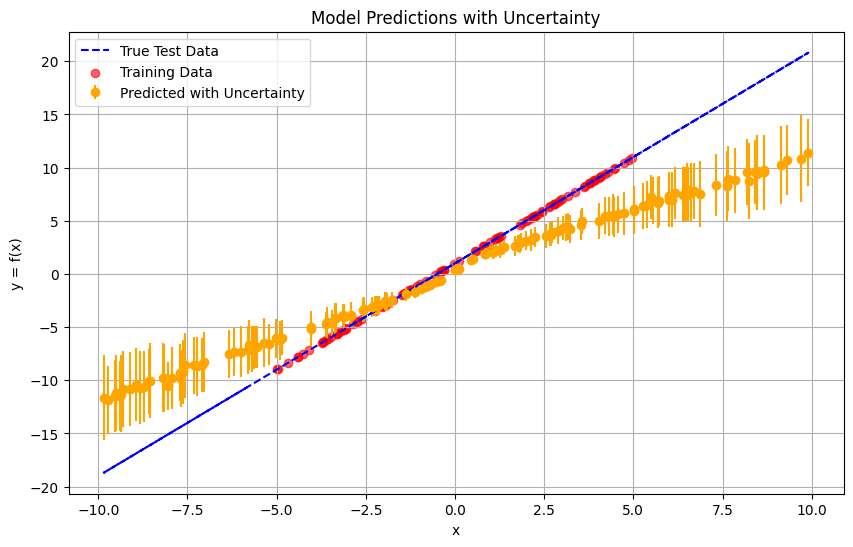

In [4]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.errorbar(x_test.flatten(), y_pred_mc.flatten(), yerr=uncertainty.flatten(), fmt='o', color='orange', label='Predicted with Uncertainty')
plt.plot(x_test, y_test, '--b', label='True Test Data')
plt.scatter(x_train, y_train, color='red', label='Training Data', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.legend()
plt.title('Model Predictions with Uncertainty')
plt.grid(True)
plt.show()


#The Interpretation of the Graphs:
**1. Regions with Low Uncertainty:** In the interval
[
−
5
,
5], the training data is dense.
The model has learned the linear relationship (
𝑦
=
2
𝑥
+
1) well in this region, leading to confident predictions.
This confidence is reflected in the low uncertainty values.

**2.Regions with High Uncertainty:** Outside the training interval (
[
−
5
,
5
]), the test data includes
𝑥
x values in
[
−
10
,
−
5
] and
[
5
,
10
]. The model encounters inputs it hasn't seen during training, making predictions less reliable. Since the model's understanding is limited in these regions, predictions vary significantly between different Monte Carlo forward passes, resulting in higher epistemic uncertainty.

**3. Key Observations:** The uncertainty increases the further we move away from the training range. This behavior aligns with the nature of epistemic uncertainty, which arises from the model's limited knowledge (e.g., fewer or no data points in a region).

**4. Explanation for High Uncertainty:** High uncertainty occurs due to the following reason and Extrapolation Beyond Training Data. The model has been trained on data only within the interval
[
−
5
,
5]. Beyond this range, it attempts to extrapolate the learned pattern. Extrapolation is inherently unreliable in machine learning models, as they are not designed to generalize confidently outside the data distribution they were trained on.

**5. Dropout in Uncertainty Quantification:** Dropout during inference allows us to observe variability in predictions. In well-trained regions ([
−
5
,
5]), predictions across multiple forward passes remain consistent, resulting in low uncertainty. In extrapolation regions, predictions vary significantly across forward passes, leading to higher uncertainty.

**6. Lack of Training Data:** The absence of training data in
[
−
10
,
−
5
] and
[
5
,
10] forces the model to rely on incomplete information, further amplifying uncertainty.

**7. Practical Implications & Model Limitations:** The high uncertainty highlights the importance of having sufficient training data in regions where the model is expected to operate. If predictions in the extrapolation region are critical, additional training data should be collected in these areas. **Decision-Making:** High uncertainty indicates that the model's predictions should not be trusted without further validation. This information can be used to guide decisions, such as refraining from deploying the model in extrapolated regions or collecting more data.

#2. Uncertainty Quantification during Adversarial Attack (50 Points)
Train a CNN model with dropout layers on MNIST Digit dataset (Use this model for all the steps below). Pick a test sample from test dataset and apply BIM attack algorithm for 30 iterations (You may set alpha = 0.01, number of iterations = 30 and epsilon = 0.18. Use l inf norm)).

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8577 - loss: 0.4621
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9636 - loss: 0.1222
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9729 - loss: 0.0897
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9773 - loss: 0.0768
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9787 - loss: 0.0660
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9818 - loss: 0.0581
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9839 - loss: 0.0509
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9867 - loss: 0.0429
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9870 - loss: 0.0394
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9877 - loss: 0.0393


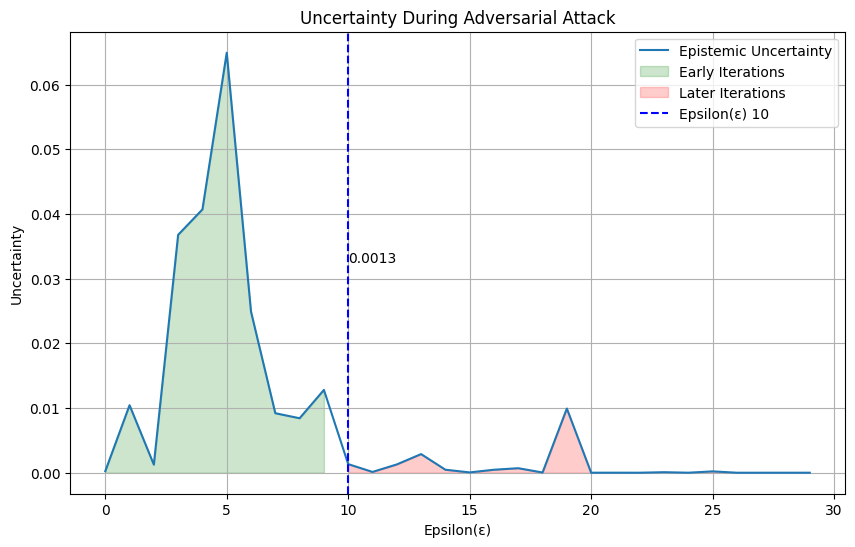

In [5]:
# Part 2: Uncertainty Quantification during Adversarial Attack
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0  # Normalize and reshape
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train)  # One-hot encode labels
y_test = to_categorical(y_test)

# Define a CNN model with dropout layers
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN
model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)

# Function to perform Basic Iterative Method (BIM) attack
def BIM_attack(model, x, y, epsilon, alpha, iterations):
    x_adv = tf.convert_to_tensor(x, dtype=tf.float32)
    for _ in range(iterations):
        with tf.GradientTape() as tape:
            tape.watch(x_adv)
            predictions = model(x_adv)
            loss = tf.keras.losses.categorical_crossentropy(y, predictions)
        gradient = tape.gradient(loss, x_adv)
        x_adv = x_adv + alpha * tf.sign(gradient)  # Add perturbation
        x_adv = tf.clip_by_value(x_adv, x - epsilon, x + epsilon)  # Clip to valid range
    return x_adv.numpy()

# Function for Monte Carlo Dropout
def predict_with_uncertainty(f_model, x_data, num_samples=10):
    preds = np.array([f_model(x_data, training=True) for _ in range(num_samples)])
    mean_preds = preds.mean(axis=0)
    uncertainty = preds.std(axis=0)
    return mean_preds, uncertainty

# Pick a test sample
x_test_sample = x_test[0].reshape(1, 28, 28, 1)
y_test_sample = y_test[0].reshape(1, -1)

# Quantify uncertainty during adversarial attack
uncertainties = []
for i in range(30):
    x_adv = BIM_attack(model, x_test_sample, y_test_sample, epsilon=0.18, alpha=0.01, iterations=i+1)
    _, uncertainty = predict_with_uncertainty(model, tf.convert_to_tensor(x_adv), num_samples=10)
    uncertainties.append(uncertainty.mean())

# Plot the change in uncertainty values during the adversarial attack
plt.figure(figsize=(10, 6))
plt.plot(uncertainties, label='Epistemic Uncertainty')
plt.xlabel('Epsilon(ε)')
plt.ylabel('Uncertainty')
plt.title('Uncertainty During Adversarial Attack')
plt.grid(True)

# Add shaded regions for clarity
plt.fill_between(np.arange(10), 0, uncertainties[:10], color='green', alpha=0.2, label='Early Iterations')
plt.fill_between(np.arange(10, 30), 0, uncertainties[10:], color='red', alpha=0.2, label='Later Iterations')

# Add a vertical line at Epsilon(ε) 10
plt.axvline(x=10, color='blue', linestyle='--', label='Epsilon(ε) 10')

# Annotate the uncertainty at Epsilon(ε) 10
plt.text(10, max(uncertainties) * 0.5, f"{uncertainties[10]:.4f}", fontsize=10)

plt.legend()
plt.show()


#Interpretation of Results
The plot of uncertainty during adversarial attack reflects how the model's confidence changes as the input becomes more perturbed:

**Early Iterations & Observations:** In the first few iterations, the adversarial perturbations are small and closer to the original image. The model correctly predicts the class label with high confidence, resulting in low uncertainty.

**Explanation:** The small perturbations do not move the adversarial sample far from the data distribution that the model has been trained on. As a result, the model's predictions remain consistent across multiple forward passes with dropout, leading to low epistemic uncertainty.

**Later Iterations & Observations:** As the number of iterations increases, the perturbations grow larger. The adversarial sample deviates significantly from the original image and may cross into regions where the model has little to no training data. Uncertainty increases because the model struggles to make reliable predictions.

**Explanation:** The adversarial sample no longer resembles the original input class and may resemble other classes or even appear as noise. The model's predictions across forward passes with dropout vary more widely, reflecting its inability to confidently classify these inputs. Epistemic uncertainty (uncertainty due to the model's knowledge) increases because the adversarial samples move into regions of the input space where the model has limited exposure.

**Key Observations in the Plot:** Initial Flat Trend: During the early iterations, uncertainty is relatively stable and low.

1. **Sharp Increase:** After a certain point *(e.g., around Epsilon(ε) 10 in this case)*, uncertainty increases significantly, indicating that the adversarial attack is beginning to strongly influence the model's predictions.

2. **Later Saturation:** At higher iterations, uncertainty may plateau as the adversarial samples fully diverge from the data distribution, making predictions almost entirely random.

#Broader Implications

1. **Understanding Model Behavior:** Uncertainty quantification provides a lens to observe how the model's knowledge is disrupted by adversarial attacks. Regions of high uncertainty correlate with areas where the model's knowledge is insufficient or unreliable.

2. **Defending Against Attacks:** Monitoring uncertainty can serve as a warning signal for adversarial inputs. For instance, if uncertainty exceeds a certain threshold, the system could reject the input or trigger additional checks.


**Conclusion**

The increasing uncertainty during the adversarial attack is a clear indication of the model's declining confidence in its predictions as the input moves further from its training distribution. This trend highlights the vulnerability of neural networks to adversarial samples and emphasizes the importance of uncertainty-aware models in safety-critical applications.